In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv("csv files\emails.csv")

#loading the dataset from csv folder
dataframe.shape


(5172, 3002)

In [3]:
import enchant

def get_new_dataframe():
    """ 
        the dataset contain two different types of word:
        1> valid words
        2> invalid words which do not exist in english dictionary

        this function will change the existing dataframe with the one
        dataframe which contain only invalid words.

        model is trained on basis of number of invalids words appear in email
    """


    dictionary = enchant.Dict("en_US")
    for col in dataframe.columns:
       
        # used to check whether the word exist or not
        if (dictionary.check(col) and col != "Prediction"):
            dataframe.drop(col, axis = 1, inplace=True)

            

In [4]:
get_new_dataframe()
dataframe.shape

# no of columns are reduced

(5172, 600)

In [5]:
# spliting the dataset for training and testing
train_set, test_set = train_test_split(dataframe, test_size=0.1)
train_set.head()

,Email No.,ect,hou,enron,hpl,mmbtu,daren,xls,http,th,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Prediction
5001,Email 5002,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3432,Email 3433,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3150,Email 3151,1,0,0,0,0,1,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1063,Email 1064,13,5,0,2,2,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2451,Email 2452,2,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# saving the test and train dataset in different files in csv folder

train_set.to_csv("csv files/train_set.csv",index=False)
test_set.to_csv("csv files/test_set.csv", index=False)

In [10]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
# shape of training set => (rows, cols)
shape = train_set.shape
cols = shape[1]     # number of columns in training set

X_train = train_set.iloc[0:, 1 : cols - 1]  # selecting column with words count, not the result or email 
y = train_set["Prediction"]     # result 
model.fit(X_train, y)   # training the model with given dataset


d:\user\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# parameters

W = model.coef_
b = model.intercept_
print(W.shape, "\n", b.shape)

(1, 598) 
 (1,)


In [21]:
model.intercept_

array([0.52191912])

In [13]:
# using the test dataset, when the model is trained

X_test = test_set.iloc[0:,1:cols -1 ]

# predicted values
predict_values = model.predict(X_test)

# original values
original_values = test_set["Prediction"]


Text(0, 0.5, 'Spam or not')

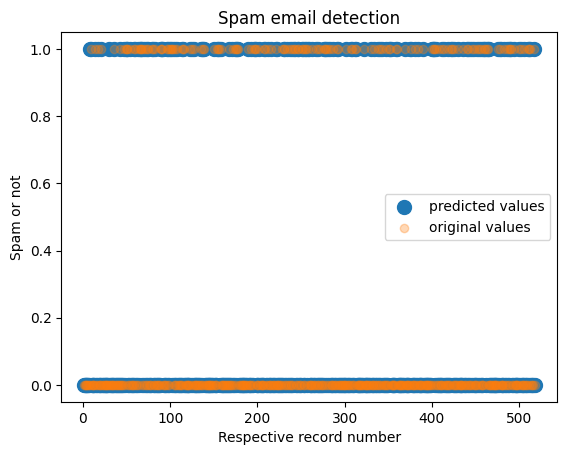

In [35]:
# computing original and predicted values aginst their respective record number
total_record = predict_values.shape[0]
record_number = np.arange(1, total_record + 1)

plt.scatter(record_number, predict_values, s = 100, label="predicted values")
plt.scatter(record_number, original_values, alpha=0.3, label="original values")
plt.title("Spam email detection")
plt.legend()
plt.xlabel("Respective record number")
plt.ylabel("Spam or not")

In [24]:
import pickle

# storing the trained model in binary file
with open("spam_email", "wb") as f:
    pickle.dump(model, f)
    